# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Camilla Månsson 

Vem du har presenterat för: Astrid Hansen

Datum då du presenterade: 2024-05-09

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
model = ResNet50(weights='imagenet')

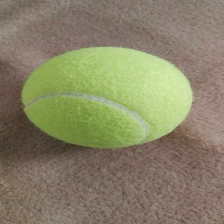

In [3]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7498354e-06), ('n03942813', 'ping-pong_ball', 5.5182763e-08)]


# 1. Take some pictures yourself and predict their class.

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Ladda modellen
model = ResNet50(weights='imagenet')

In [10]:
# Lista med filvägar till bilderna
image_paths = [
    'banan.jpg', 
    'äpple.jpg', 
    'citron.jpg', 
    'traktor.jpg', 
    'lampa.jpg', 
    'tomat.jpg', 
    'gröna.tomater.jpg', 
    'träd.jpg', 
    'tulpaner.jpg', 
    'tårta.jpg', 
    'pizza.jpg', 
    'toffel.jpg'
]

In [11]:
# Förbehandla alla bilder och samla in dem i en batch
batch_images = []
for img_path in image_paths:
    # Ladda och förbehandla bilden
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Lägg till den förbehandlade bilden till batchen
    batch_images.append((img_path, x))

In [12]:
# Prediktera klasser för hela batchen
preds = model.predict(np.concatenate([x for _, x in batch_images], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


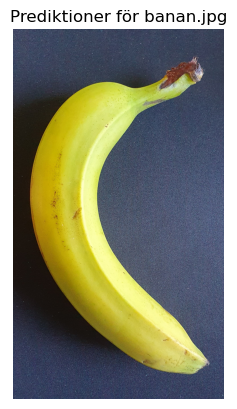

Prediktioner för banan.jpg
banana : 0.99972326
hook : 0.00010740274
slug : 4.6643774e-05



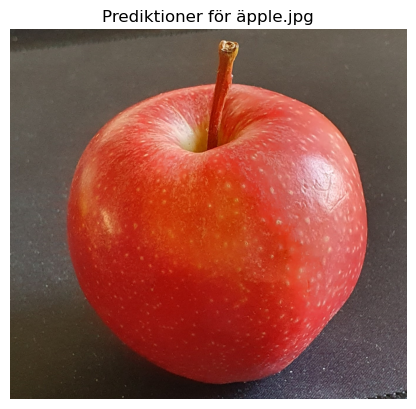

Prediktioner för äpple.jpg
Granny_Smith : 0.43864778
banana : 0.09543836
orange : 0.07395017



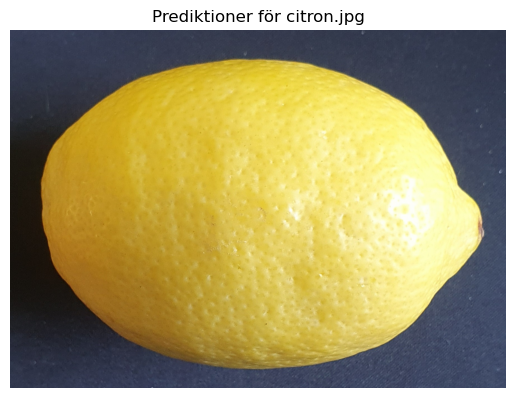

Prediktioner för citron.jpg
lemon : 0.99919957
dough : 0.00074757944
orange : 2.9899213e-05



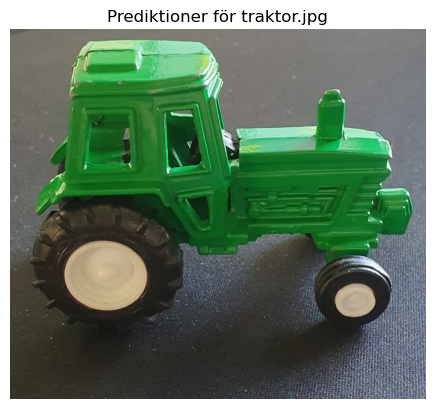

Prediktioner för traktor.jpg
tractor : 0.638437
harvester : 0.15899926
lawn_mower : 0.13082838



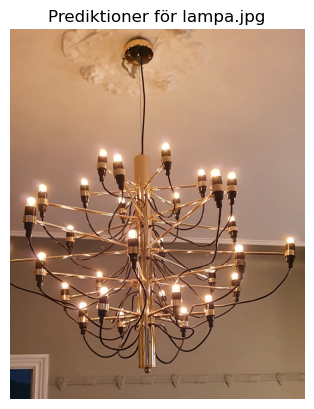

Prediktioner för lampa.jpg
lampshade : 0.9327418
table_lamp : 0.017667577
dining_table : 0.0062495726



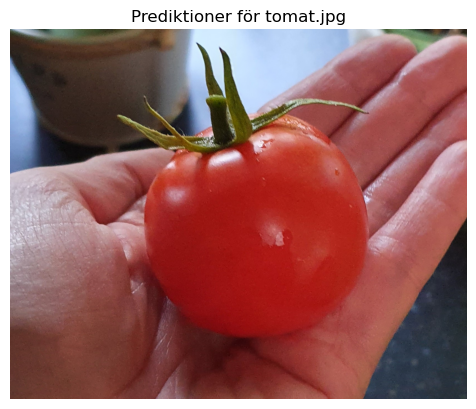

Prediktioner för tomat.jpg
hip : 0.48094305
strawberry : 0.19119303
bell_pepper : 0.10727749



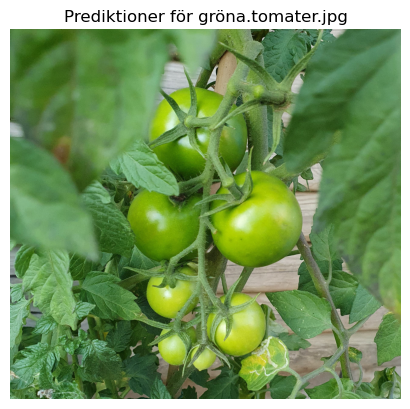

Prediktioner för gröna.tomater.jpg
acorn : 0.62379986
Granny_Smith : 0.13129723
hip : 0.10383606



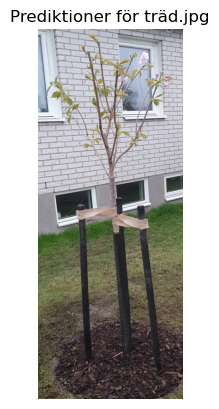

Prediktioner för träd.jpg
apiary : 0.4714254
picket_fence : 0.09573506
mobile_home : 0.076026976



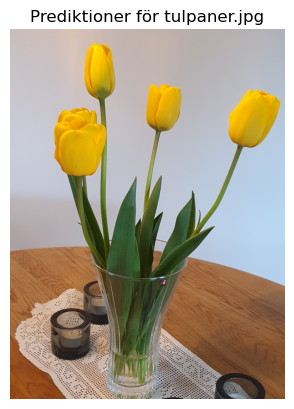

Prediktioner för tulpaner.jpg
vase : 0.9099511
pot : 0.017255407
dining_table : 0.01623655



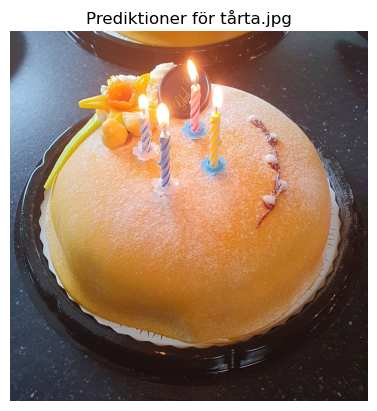

Prediktioner för tårta.jpg
orange : 0.6083105
candle : 0.14255749
ice_cream : 0.06402783



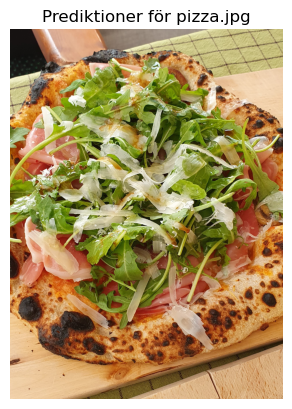

Prediktioner för pizza.jpg
pizza : 0.9995129
plate : 0.00010296359
guacamole : 8.510159e-05



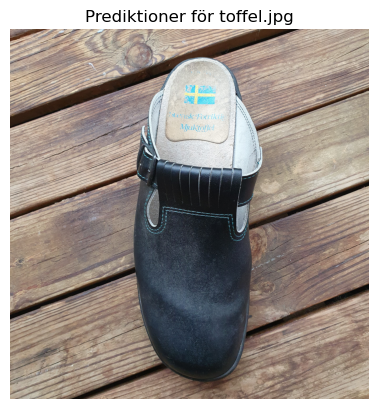

Prediktioner för toffel.jpg
beer_bottle : 0.27053896
Loafer : 0.20898594
water_bottle : 0.14845645



In [13]:
# Avkoda prediktionerna för varje bild i batchen och visa bilderna
for i, (img_path, _) in enumerate(batch_images):
    predictions = decode_predictions(preds[i:i+1], top=3)[0]
    
    plt.figure()
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediktioner för " + img_path)
    
    plt.show()
    
    print("Prediktioner för", img_path)
    for pred in predictions:
        print(pred[1], ":", pred[2])
    print()

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Pretrained models offer many advantages. By using a pre-existing model that has already been trained on large and diverse datasets enables significant time and resource savings. The model leverages the broad knowledge developed during training, resulting in effective and reliable predictions for new data. Pretrained models also provide access to expertise within the field, which can increase the chances of successful outcomes in new applications and scenarios.